# [ PART 05. 정형 데이터마이닝 ] - 1장. 데이터 분할과 성과분석

## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd


# training/test data set을 추출하는 패키지
from sklearn.model_selection import train_test_split    

# Confusion Matrix 관련 패키지
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import *

## 1. 데이터 분할
- 데이터 분할은 train, validation, test data로 분할하여 모델 평가에 사용
- 전체데이터에서 각각 train(50%), validataion(30%), test(20%)로 분할하며, 데이터의 갯수가 작으면 validation을 생략하고 training과 test를 6:4 또는 7:3으로 두고 분석을 진행.

In [2]:
# 데이터프레임 생성

df_credit = pd.read_csv( "C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\german_credit_dataset.csv")

df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [3]:
train_valid, test = train_test_split( df_credit,
                                      test_size = 0.2, random_state = 2000 )

train, valid = train_test_split( train_valid,
                                 test_size = 3/8,  random_state = 2000 )

In [4]:
display( 'train', train.shape )
print()
display( 'valid', valid.shape )
print()
display( 'test', test.shape )
print()

'train'

(500, 21)

'valid'

(300, 21)

'test'

(200, 21)

In [5]:
train_valid, test = train_test_split( df_credit, test_size = 0.2,
                                      stratify = df_credit['credit.rating'], random_state = 2000 )

train, valid = train_test_split( train_valid, test_size = 3/8,
                                 stratify = train_valid['credit.rating'], random_state = 2000 )

In [6]:
display( 'train', train['credit.rating'].value_counts() )
print()
display( 'valid', valid['credit.rating'].value_counts() )
print()
display( 'test', test['credit.rating'].value_counts() )
print()

'train'

1    350
0    150
Name: credit.rating, dtype: int64

'valid'

1    210
0     90
Name: credit.rating, dtype: int64

'test'

1    140
0     60
Name: credit.rating, dtype: int64

## 2. 성과분석
- 성과분석은 데이터마이닝을 통해 train set으로 모델링 한 뒤, test set으로 정확도, 특이도 등을 알아보기 위한 과정

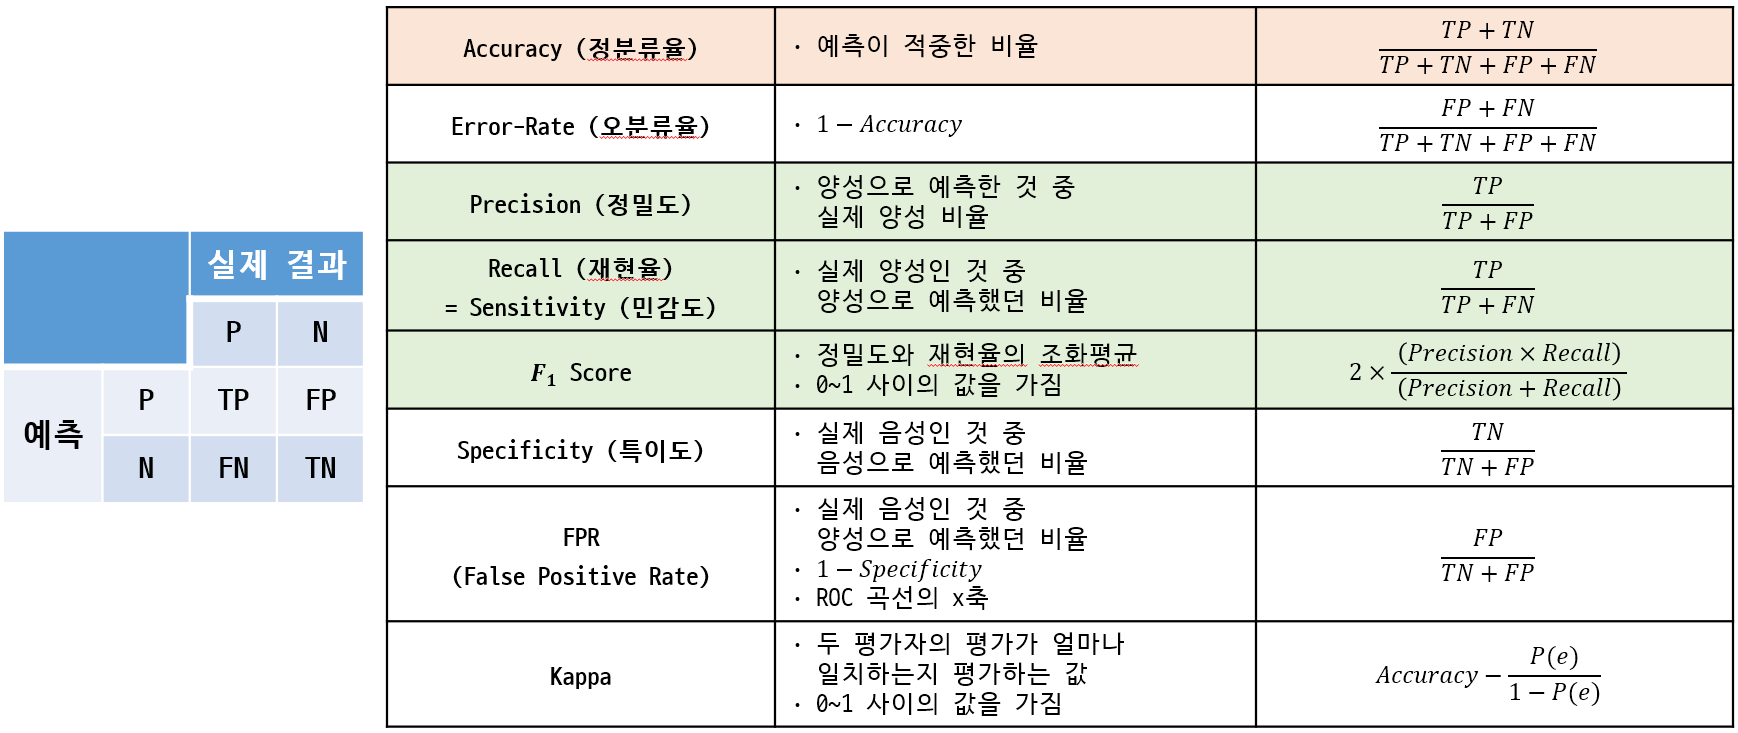

### 2.1. 오분류표(Confusion Matrix)
- caret패키지에서 제공하는 confusionMatriox를 활용하면 정확도, 특이도 등이 손쉽게 정리된 결과를 얻을 수 있음.

In [7]:
pred = np.array( [1,0,0,1,1,1,0,0,0,1,1,1] )
true = np.array( [1,0,0,1,1,0,1,1,0,1,1,1] )

In [8]:
confusion_matrix(true, pred)

array([[3, 1],
       [2, 6]], dtype=int64)

In [9]:
pd.crosstab( true, pred, rownames=['pred'], colnames=['real'] )

real,0,1
pred,,
0,3,1
1,2,6


.  
https://scikit-learn.org/stable/modules/model_evaluation.html  
.

In [10]:
print( 'Accuracy', accuracy_score(true, pred) )
print()

print( 'precision : ', precision_score(true, pred) )
print(  )

print( 'recall : ', recall_score(true, pred) )
print(  )

print( 'f1_score : ', f1_score(true, pred) )
print(  )

print( 'kappa : ', cohen_kappa_score(true, pred) )
print(  )

Accuracy 0.75

precision :  0.8571428571428571

recall :  0.75

f1_score :  0.7999999999999999

kappa :  0.47058823529411764



In [11]:
print( classification_report(true, pred) )
print()

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.86      0.75      0.80         8

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12




In [15]:
print( classification_report(pred, true) )
print()

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.75      0.86      0.80         7

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12




### 2.2. ROC CURVE
- 이진 분류 분석 모형을 비교 분석 결과를 가시화할 수 있다는 점에서 유용한 평가 도구.
- ROC 그래프의 가로축은 1-특이도, 세로축은 민감도로 구성되어 이 두 값의 관계로 모형을 평가
- 모형의 성과를 평가하는 기준은 ROC 그래프의 밑부분 면적(Area Under the ROC Curve,AUC)이 넓을수록 좋은 모형

In [12]:
fpr, tpr, _ = roc_curve(true, pred)

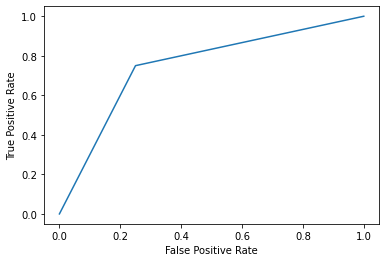

In [13]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [14]:
roc_auc_score(true, pred)

0.75